In [1]:
# The purpose of this file is to try rule based models to predict the endotype of the 6 cohorts 
# we will calculate the accuracy of the prediction and the importance of the features
# we will also calculate the sensitivity and specificity of the prediction as well as PPV and NPV 
# created by Zhongyu Li, June 2024 
# Note: we will only use 6 cohort with HOMA2IR and HOMA2B data

In [11]:
# load libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pylcs

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [17]:
os. getlogin()

'root'

In [ ]:
#not working, need to figure out why as of 5.18.24 

os. getlogin()

if os.getlogin()=="JVARGH7":
    path_folder = 'C:/Cloud/Emory University/li, zhongyu - Diabetes Endotypes Project (JV and ZL)'
if os.getlogin()=='zhongyuli':
    path_folder = '/Users/zhongyuli/Library/CloudStorage/OneDrive-EmoryUniversity/Diabetes Endotypes Project (JV and ZL)'

# Rename the dataset into analytic sample
analytic_dataset = pd.read_csv(path_folder + '/working/processed/final_dataset.csv')


In [7]:
# first, we will load the data and conduct k means clustering to create the "TRUE labels"
# we will use the HOMA2IR and HOMA2B data to create the labels
# we will use the first 6 cohorts


path = '/Users/zhongyuli/Desktop/python/cluster analysis/dataset/final_dataset.csv'

analytic_dataset = pd.read_csv(path) 

#drop missing values
method3_df = analytic_dataset[analytic_dataset['method3'] == 1]

#select variables 
selected_variables = ['bmi', 'hba1c', 'dmagediag','homa2b','homa2ir','tgl','ldlc','ratio_th','sbp','dbp','hdlc','study']

#drop missing values in the selected variables
method3_df = method3_df[selected_variables]
method3_df = method3_df.dropna()

#check the data
method3_df.head()



,bmi,hba1c,dmagediag,homa2b,homa2ir,tgl,ldlc,ratio_th,sbp,dbp,hdlc,study
0,33.37665,6.9,70.0,102.7,2.217295,124,83.0,3.179487,119.2454,65.9166,39.0,jhs
1,27.76165,6.5,68.0,113.6,1.945525,101,81.0,1.980392,119.2454,65.0865,51.0,jhs
2,30.73822,7.9,51.0,40.6,2.192982,117,131.0,3.342857,162.3397,99.1206,35.0,jhs
3,43.56290,6.9,65.0,99.9,2.469136,78,97.0,1.322034,130.2482,70.0671,59.0,jhs
4,29.33333,6.5,77.0,104.9,2.577320,158,112.0,2.724138,121.0792,64.2564,58.0,jhs


In [8]:
#take out the "study" variable
study = method3_df['study']
method3_df = method3_df.drop(columns = ['study']) 

method3_df.shape

(3771, 11)

In [9]:
# check if there are any missing values
method3_df.isnull().sum()
# check variable types
method3_df.dtypes



bmi          float64
hba1c        float64
dmagediag    float64
homa2b       float64
homa2ir      float64
tgl            int64
ldlc         float64
ratio_th     float64
sbp          float64
dbp          float64
hdlc         float64
dtype: object

In [12]:
#run kmeans clustering to create the TRUE labels
#standardize the data
scaler = StandardScaler()
method3_df_scaled = scaler.fit_transform(method3_df)

method3_df_scaled = pd.DataFrame(method3_df_scaled, columns=method3_df.columns)



In [23]:
method3_df_scaled.head()

,bmi,hba1c,dmagediag,homa2b,homa2ir,tgl,ldlc,ratio_th,sbp,dbp,hdlc
0,-0.032257,0.300357,0.645757,-0.220785,-0.458673,-0.242366,-0.774925,-0.090932,-0.326612,-0.636184,-0.668157
1,-0.832829,-0.048265,0.489212,-0.091397,-0.560173,-0.512939,-0.830633,-0.511314,-0.326612,-0.692720,0.252415
2,-0.408438,1.171911,-0.841426,-0.957942,-0.467753,-0.324714,0.562068,-0.033657,1.987405,1.625245,-0.975014
3,1.420073,0.300357,0.254393,-0.254023,-0.364617,-0.783512,-0.384969,-0.742123,0.264201,-0.353505,0.866129
4,-0.608743,-0.048265,1.193667,-0.194670,-0.324213,0.157612,0.032841,-0.250570,-0.228143,-0.749256,0.789414


In [13]:
# run kmeans and get cluster labels from the five variable method (method 3)
kmeans = KMeans(
    init="random", n_clusters=4, n_init=10, max_iter=300, random_state=57
)

# select five variables to cluster
var_m3 = ['bmi', 'hba1c', 'dmagediag','homa2b','homa2ir']
cluster_m3 = method3_df_scaled[var_m3]

kmeans = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300, random_state=57)
kmeans.fit(cluster_m3)

KMeans(init='random', n_clusters=4, n_init=10, random_state=57)

In [14]:
# summarize the cluster labels 
method3_df_cluster = method3_df.copy()
method3_df_cluster['cluster'] = kmeans.labels_
method3_df_cluster['cluster'].value_counts()


cluster
0    1766
1    1481
3     290
2     234
Name: count, dtype: int64

In [15]:
#summarize variables by cluster
method3_df_cluster.groupby('cluster').mean()

,bmi,hba1c,dmagediag,homa2b,homa2ir,tgl,ldlc,ratio_th,sbp,dbp,hdlc
cluster,,,,,,,,,,,
0,29.624151,6.269762,70.743322,86.821631,2.107629,133.261608,106.051076,2.960120,127.687002,70.621010,50.251076
1,38.086894,6.384085,51.314338,133.598042,3.866042,155.496286,117.407562,3.903651,122.223853,80.640832,44.889804
2,34.958178,9.900000,55.524927,52.536325,3.077110,149.948718,116.474359,3.587225,126.418088,80.898582,47.239316
3,33.839130,6.470690,65.299499,323.935517,9.741132,153.713793,101.668966,3.860884,125.934720,71.448641,47.013793


In [16]:
# remane the cluster labels
method3_df_cluster['cluster'] = method3_df_cluster['cluster'].replace({0: 'MARD', 1: 'MOD', 2: 'SIDD', 3: 'SIRD'})
method3_df_cluster['cluster'].value_counts()


cluster
MARD    1766
MOD     1481
SIRD     290
SIDD     234
Name: count, dtype: int64

In [17]:
#summarize variables by cluster
method3_df_cluster.groupby('cluster').mean()

,bmi,hba1c,dmagediag,homa2b,homa2ir,tgl,ldlc,ratio_th,sbp,dbp,hdlc
cluster,,,,,,,,,,,
MARD,29.624151,6.269762,70.743322,86.821631,2.107629,133.261608,106.051076,2.960120,127.687002,70.621010,50.251076
MOD,38.086894,6.384085,51.314338,133.598042,3.866042,155.496286,117.407562,3.903651,122.223853,80.640832,44.889804
SIDD,34.958178,9.900000,55.524927,52.536325,3.077110,149.948718,116.474359,3.587225,126.418088,80.898582,47.239316
SIRD,33.839130,6.470690,65.299499,323.935517,9.741132,153.713793,101.668966,3.860884,125.934720,71.448641,47.013793


### NOW we will run Learning Classifier Systems (LCS) [ not working as of 6.10.24]

In [18]:
# Select the variables
var_m4 = ['bmi', 'hba1c', 'dmagediag', 'tgl', 'ldlc', 'ratio_th', 'sbp', 'dbp', 'hdlc']
X = method3_df_cluster[var_m4]
y = method3_df_cluster['cluster']

# Split the data into training and testing sets (30% test dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57, stratify=y)

# Initialize the LCS
lcs = pylcs.XCSClassifier(n_population=100, mutation_rate=0.05, crossover_rate=0.8, n_generations=50)

# Train the LCS
lcs.fit(X_train, y_train)

# Predict on the test set
y_pred = lcs.predict(X_test)

# Evaluate the performance
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

AttributeError: module 'pylcs' has no attribute 'XCSClassifier'

### Try DecisionTreeClassifier from the sklearn package. 

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset (replace 'diabetes_data.csv' with your actual data file)
# For the purpose of this example, we use a hypothetical dataset

var_m4 = ['bmi', 'hba1c', 'dmagediag', 'tgl', 'ldlc', 'ratio_th', 'sbp', 'dbp', 'hdlc']
X = method3_df_cluster[var_m4]
y = method3_df_cluster['cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57, stratify=y)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)  # Adjust max_depth as needed

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Generate and display rules
rules = export_text(clf, feature_names=var_m4)
print(rules)


Accuracy: 0.8471731448763251
              precision    recall  f1-score   support

        MARD       0.84      0.94      0.89       530
         MOD       0.84      0.90      0.87       445
        SIDD       0.90      0.86      0.88        70
        SIRD       0.00      0.00      0.00        87

    accuracy                           0.85      1132
   macro avg       0.65      0.67      0.66      1132
weighted avg       0.78      0.85      0.81      1132

|--- dmagediag <= 62.30
|   |--- hba1c <= 8.15
|   |   |--- bmi <= 30.92
|   |   |   |--- dmagediag <= 51.36
|   |   |   |   |--- bmi <= 27.67
|   |   |   |   |   |--- class: MARD
|   |   |   |   |--- bmi >  27.67
|   |   |   |   |   |--- class: MOD
|   |   |   |--- dmagediag >  51.36
|   |   |   |   |--- bmi <= 28.73
|   |   |   |   |   |--- class: MARD
|   |   |   |   |--- bmi >  28.73
|   |   |   |   |   |--- class: MARD
|   |   |--- bmi >  30.92
|   |   |   |--- dmagediag <= 56.51
|   |   |   |   |--- hba1c <= 7.85
|   |   |  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

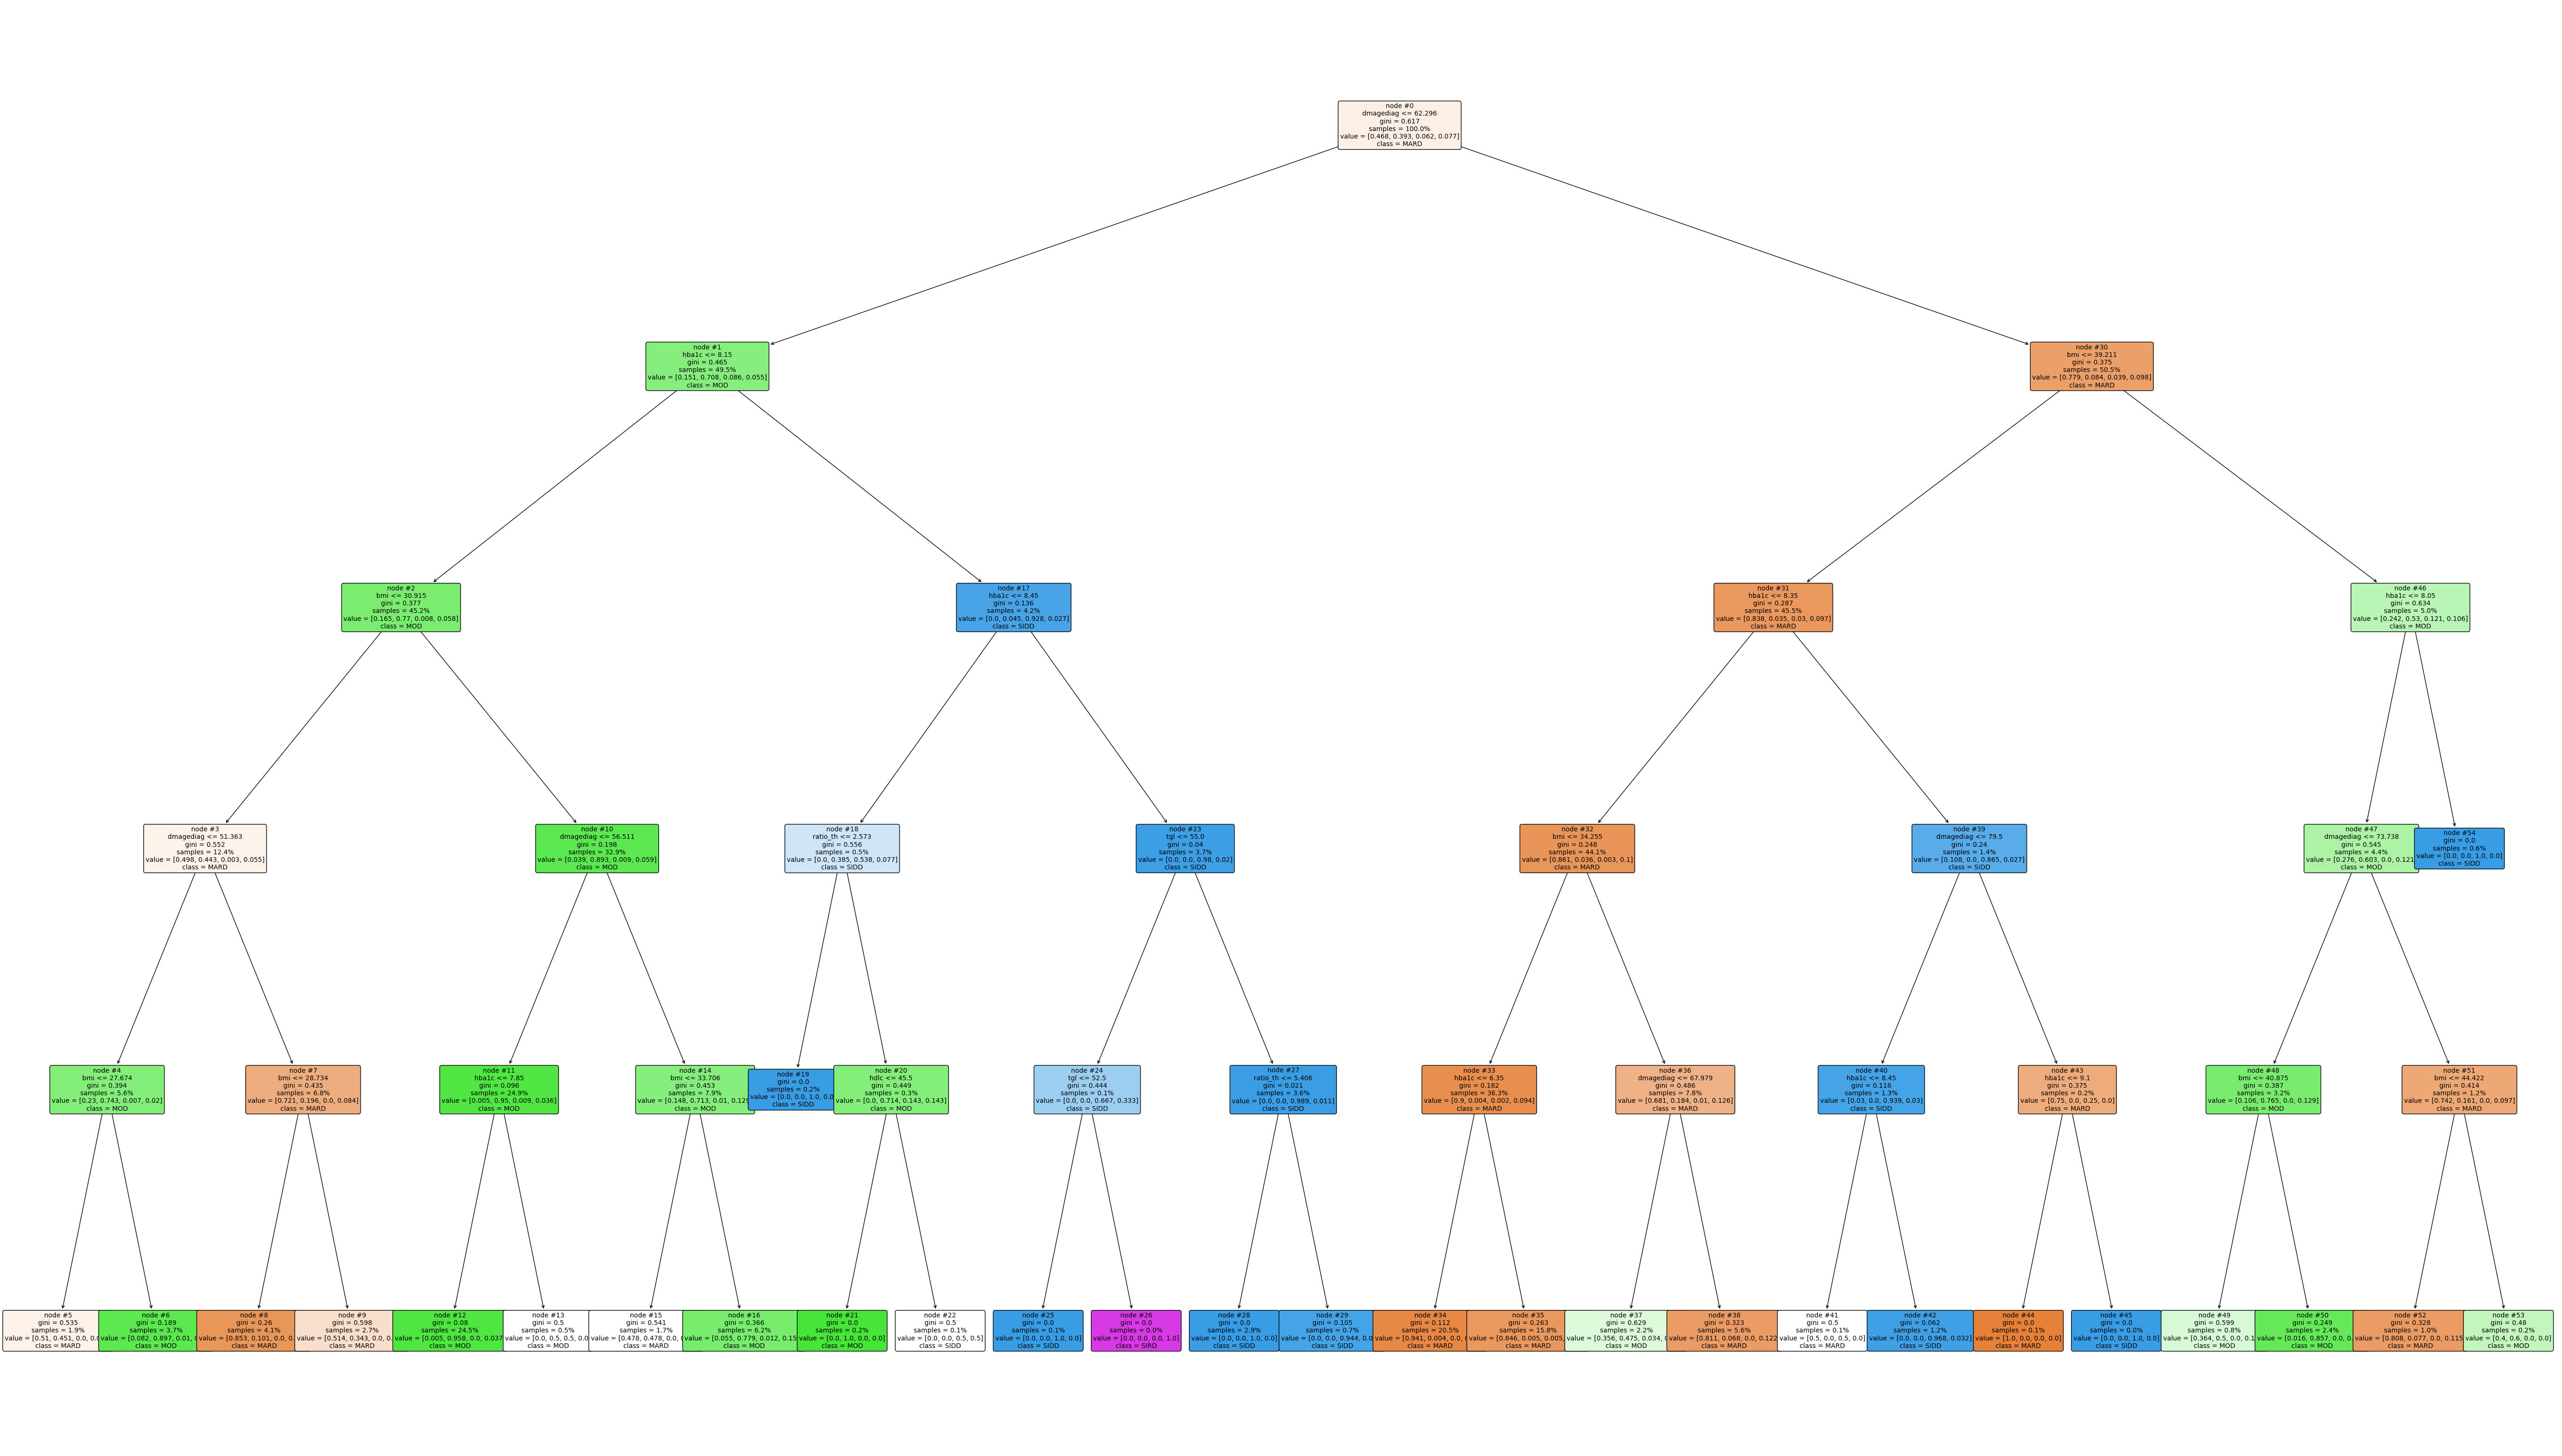

In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(70, 40))
plot_tree(clf, feature_names=var_m4, class_names=clf.classes_.astype(str), filled=True, rounded=True, fontsize=10, proportion=True, node_ids=True)

# Save the plot if needed
plt.savefig('diabetes_decision_tree.png', bbox_inches='tight')

# Show the plot
plt.show()